# 스타벅스, 이디야

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#한글 폰트
import matplotlib.pyplot as plt

plt.rc("font",family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [3]:
#데이터 불러오기
df = pd.read_csv("C:\\Users\\user7\\Desktop\\data\\상가상권정보\\상가업소정보_201912_01.csv", sep='|')
df.shape

(573680, 39)

## 데이터 전처리

### 데이터 확인

In [4]:
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

* 결측치가 존재함을 확인

### 결측치 보기

In [6]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

### 사용하지 않는 컬럼 제거

In [7]:
# 사용할 칼럼만을 추출
columns = {'상호명','상권업종대분류명','상권업종중분류명',
          '상권업종소분류명','시도명','시군구명','행정동명','법정동명','도로명주소','경도','위도'}
df = df[columns].copy()
df.shape

(573680, 11)

### 색인으로 서브셋

In [8]:
# 서울시만 추출
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(407376, 11)

### 특정 텍스트가 들어가는 데이터만 추출
* 대소문자가 섞인 상태일 지 모르므로 모두 소문자로 변환

In [9]:
# 소문자로 변경한 칼럼을 만듬
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [10]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya"),"상호명_소문자"]

1675       이디야커피
2957       이디야커피
8534       이디야커피
13913        이디아
14605      이디야커피
           ...  
557161     이디야커피
557163     이디야커피
557498     이디야커피
565196    이디아스포츠
568636     이디야커피
Name: 상호명_소문자, Length: 543, dtype: object

In [11]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks"),"상호명_소문자"]

1104                스타벅스
2023           스타벅스종로3가점
2770                스타벅스
14770     스타벅스커피여의도ifc1f
14781               스타벅스
               ...      
563387              스타벅스
567090              스타벅스
567828              스타벅스
570096              스타벅스
571052              스타벅스
Name: 상호명_소문자, Length: 506, dtype: object

In [12]:
df_cafe = df_seoul[df_seoul["상호명_소문자"].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

(1049, 12)

In [13]:
df_cafe["상호명_소문자"].unique()

array(['스타벅스', '이디야커피', '스타벅스종로3가점', '이디아', '스타벅스커피여의도ifc1f',
       '이디야ibk고객센터', '스타벅스신림사거리점', '대신이디아이서원주유소', '이디야서대문점2호',
       '스타벅스커피홍대역', '이디아커피', '스타벅스올림픽평화의문점', 'ediya커피', '스타벅스새문안로점',
       '스타벅스연신내역', '스타벅스연세백양로점', '스타벅스가락시장역점', '스타벅스외대점', '스타벅스명지대점',
       '스타벅스석촌역', '스타벅스압구정로데오역', '이디야커피전농뉴타운점', '스타벅스연대동문', '스타벅스서울대입구역점',
       '스타벅스신림점', '이디아이박정어학원', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스광장점',
       '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '이디아커피선릉아이빌점',
       '스타벅스연희dt점', '스타벅스삼선교점', '스타벅스커피여의도호성', '스타벅스충정타워', '스타벅스올림픽공원북문점',
       '스타벅스종각점', '스타벅스이수역점', '스타벅스방배카페입구', '스타벅스w-mall점', '이디야커피이대역점',
       '스타벅스마포일진빌딩점', '스타벅스천호로데오점', '스타벅스명동메트로', '스타벅스용산역점',
       '스타벅스마포아크로타워점', '스타벅스중계역점', '이디야커피자양동점', '스타벅스남부터미널2점',
       '스타벅스중랑구청점', '스타벅스구로디지털로점', '스타벅스논현힐탑', '스타벅스종로관수점',
       '이디야커피은행나무사거리점', '스타벅스삼성도심공항점', '이디야커피마포kcc점', '스타벅스종로2가점',
       '스타벅스선정릉역점', '스타벅스미아역점', '스타벅스명동역', '스타벅스선릉로점', '스타벅스역삼럭키',
       '이디아동묘역점', '스타벅스이태원거리점', '스타벅스커피신도림디큐브시티b2', '이디야커피천호현대점',

In [14]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'),"브랜드명"] = "스타벅스"
df_cafe[["상호명_소문자", "브랜드명"]].head()

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,NaN
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,NaN


In [15]:
## df_cafe["브랜드명"].fillna("이디야")
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'),"브랜드명"] = "이디야"
df_cafe[["상호명_소문자", "브랜드명"]].head()

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


In [16]:
df_cafe[["상호명","브랜드명"]].head()

,상호명,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


## 시각화

### countplot

In [17]:
df_cafe["상권업종중분류명"].value_counts()

커피점/카페       1036
학원-어학           3
광고/인쇄           2
기타판매업           1
주택수리            1
분양              1
주유소/충전소         1
종합소매점           1
유흥주점            1
패스트푸드           1
운동/경기용품소매       1
Name: 상권업종중분류명, dtype: int64

In [18]:
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"].copy()
df_cafe.shape

(1036, 13)

In [19]:
df_cafe["브랜드명"].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

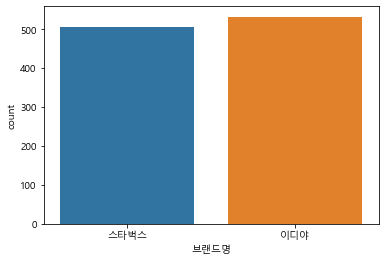

In [20]:
sns.countplot(data=df_cafe, x="브랜드명")

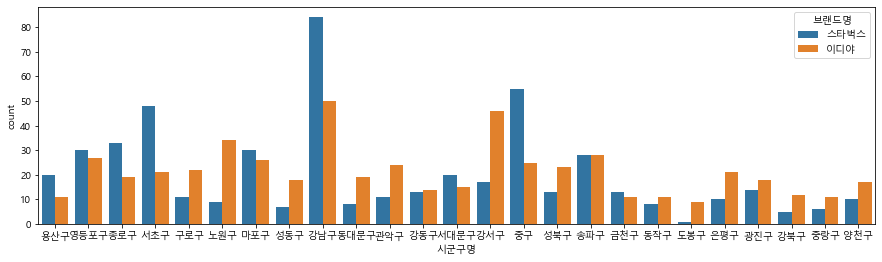

In [21]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

### scatterplot

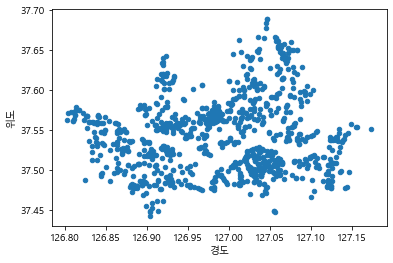

In [22]:
df_cafe[["위도","경도"]].plot.scatter(x="경도",y="위도")

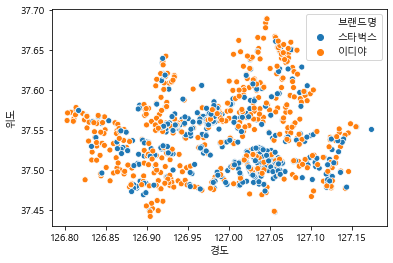

In [23]:
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

* 중심지에는 스타벅스가 많음을 확인

### jointplot

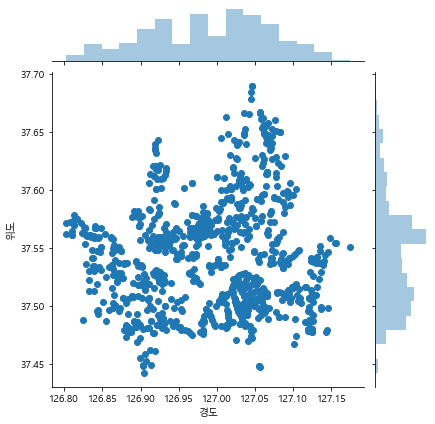

In [24]:
sns.jointplot(data=df_cafe, x="경도", y="위도")

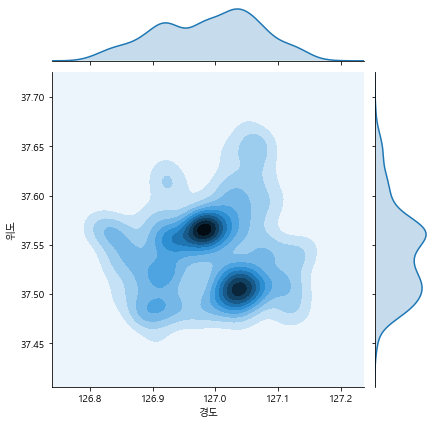

In [25]:
sns.jointplot(data=df_cafe, x="경도", y="위도",kind="kde")

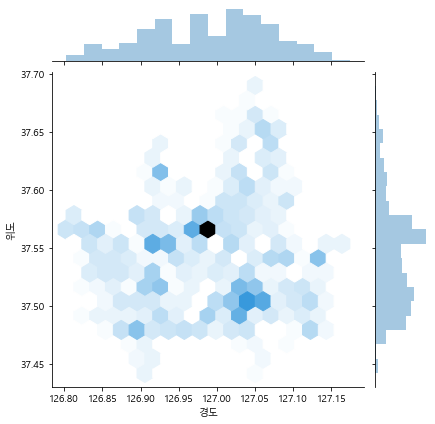

In [26]:
sns.jointplot(data=df_cafe, x="경도", y="위도",kind="hex")

## 구별 브랜드별 점포수

### groupby

In [27]:
df_cafe.head(3)

,위도,상호명,상권업종소분류명,시도명,도로명주소,경도,법정동명,행정동명,시군구명,상권업종중분류명,상권업종대분류명,상호명_소문자,브랜드명
1104,37.534303,스타벅스,커피전문점/카페/다방,서울특별시,서울특별시 용산구 이태원로 188,126.994781,이태원동,이태원1동,용산구,커피점/카페,음식,스타벅스,스타벅스
1675,37.515118,이디야커피,커피전문점/카페/다방,서울특별시,서울특별시 영등포구 영등포로 353,126.918062,신길동,신길1동,영등포구,커피점/카페,음식,이디야커피,이디야
2023,37.570585,스타벅스종로3가점,커피전문점/카페/다방,서울특별시,서울특별시 종로구 종로 113-1,126.990207,종로3가,종로1.2.3.4가동,종로구,커피점/카페,음식,스타벅스종로3가점,스타벅스


In [28]:
df_cafe_vs = df_cafe.groupby(["시군구명","브랜드명"])["상호명"].count()
df_cafe_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

In [29]:
# reset_index 로 인덱스를 컬럼으로 만들기
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [30]:
# 칼럼 이름 바꾸기
df_cafe_vs.columns = ["구","브랜드명","매장수"]
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


### pivot_table

In [31]:
pivot = pd.pivot_table(data=df_cafe, index=["시군구명","브랜드명"],values="상호명",aggfunc="count")
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [32]:
pivot.loc["강남구",]

,상호명
브랜드명,
스타벅스,84
이디야,50


* 강남구는 스타벅스가 이디야보다 많다.

## 시각화

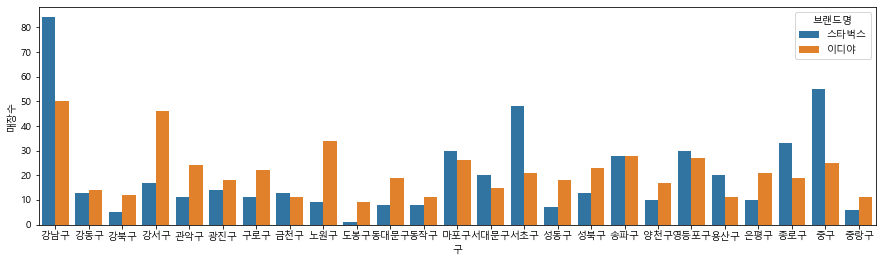

In [34]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_cafe_vs, x="구",y="매장수", hue="브랜드명")

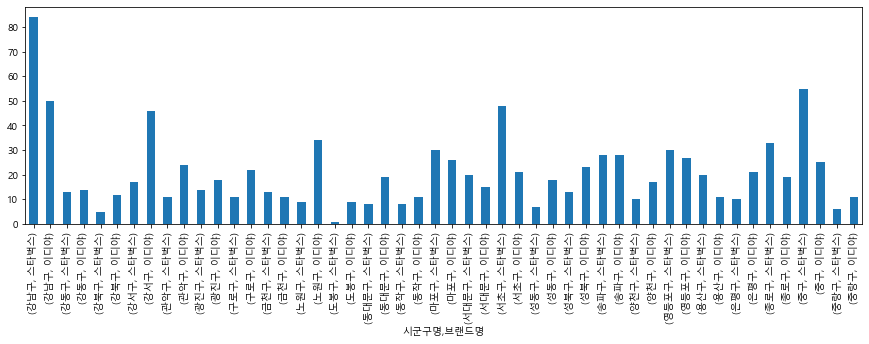

In [37]:
group = df_cafe.groupby(["시군구명","브랜드명"])["상호명"].count()
group.plot.bar(figsize=(15,4))

In [39]:
group.unstack()

브랜드명,스타벅스,이디야
시군구명,,
강남구,84,50
강동구,13,14
강북구,5,12
강서구,17,46
관악구,11,24
광진구,14,18
구로구,11,22
금천구,13,11
노원구,9,34


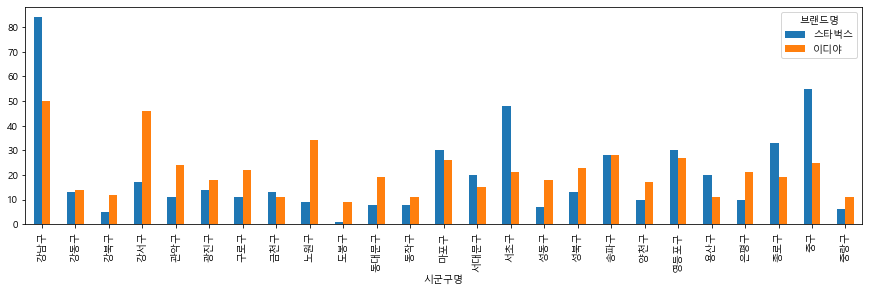

In [41]:
group.unstack().plot.bar(figsize=(15,4))

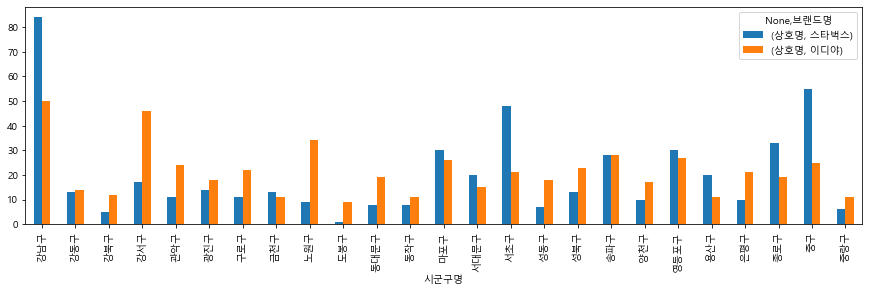

In [44]:
pivot.unstack().plot.bar(figsize=(15,4))

In [45]:
#unstack 한 결과와 같다
pd.pivot_table(data=df_cafe, index="시군구명", columns="브랜드명", values="상호명", aggfunc="count")

브랜드명,스타벅스,이디야
시군구명,,
강남구,84,50
강동구,13,14
강북구,5,12
강서구,17,46
관악구,11,24
광진구,14,18
구로구,11,22
금천구,13,11
노원구,9,34


In [46]:
pivot = pd.pivot_table(data=df_cafe, index="시군구명", columns="브랜드명", values="상호명", aggfunc="count")

* seaborn의 장점: 복잡한 연산 알아서 시각화

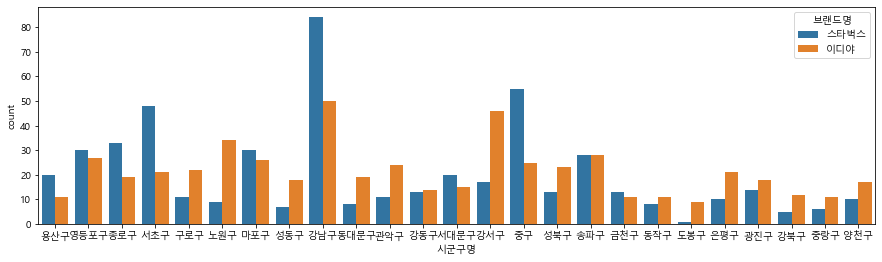

In [48]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

## Folium

### folium으로 Marker, CircleMarker

In [50]:
import folium

In [52]:
# 지도 중심을 지정하기 위해 위도,경도 평균 구함

lat = df_cafe["위도"].mean()
long = df_cafe["경도"].mean()

In [63]:
m = folium.Map([lat,long], zoom_start=12)

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i,"위도"]
    sub_long = df_cafe.loc[i,"경도"]
    
    title = df_cafe.loc[i,"상호명"] + "-" + df_cafe.loc[i,"도로명주소"]
    
    #브랜드별로 다른 색
    color="green"
    if df_cafe.loc[i,"브랜드명"] == "이디야" :
        color= "blue"
    
    folium.CircleMarker([sub_lat,sub_long],
                  radius=3,
                  color=color,
                  tooltip=title).add_to(m)

m

### choropleth

In [90]:
geo_path = 'C:/Users/user7/Desktop/data/상가상권정보/seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding="utf-8"))
geo_json["features"]

[{'type': 'Feature',
  'properties': {'code': '11250',
   'name': '강동구',
   'name_eng': 'Gangdong-gu',
   'base_year': '2013'},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[127.11519584981606, 37.557533180704915],
     [127.11879551821994, 37.557222485451305],
     [127.12146867175024, 37.55986003393365],
     [127.12435254630417, 37.56144246249796],
     [127.13593925898998, 37.56564793048277],
     [127.14930548011061, 37.56892250303897],
     [127.15511020940411, 37.57093642128295],
     [127.16683184366129, 37.57672487388627],
     [127.17038810813094, 37.576465605301046],
     [127.17607118428914, 37.57678573961056],
     [127.17905504160184, 37.57791388161732],
     [127.17747787800164, 37.57448983055031],
     [127.1781775408844, 37.571481967974336],
     [127.17995281860672, 37.569309661290504],
     [127.18122821955262, 37.56636089217979],
     [127.18169407550688, 37.56286338914073],
     [127.18408792330152, 37.55814280369575],
     [127.18350810324185, 37.55005300

#### 스타벅스 매장분포

In [79]:
df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"].copy()
df_star.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,11


In [82]:
# geo_json 에서 구 이름 가져옴
geo_json["features"][0]["properties"]["name"]

'강동구'

In [85]:
m = folium.Map([lat,long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=['구','매장수'],
    key_on= 'feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장 수').add_to(m)

m

#### 이디야 매장 분포

In [88]:
df_ediya = df_cafe_vs[df_cafe_vs["브랜드명"] == "이디야"].copy()
df_ediya.head()

,구,브랜드명,매장수
1,강남구,이디야,50
3,강동구,이디야,14
5,강북구,이디야,12
7,강서구,이디야,46
9,관악구,이디야,24


In [89]:
m = folium.Map([lat,long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['구','매장수'],
    key_on= 'feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장 수').add_to(m)

m

In [92]:
m = folium.Map([lat,long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['구','매장수'],
    key_on= 'feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장 수').add_to(m)

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i,"위도"]
    sub_long = df_cafe.loc[i,"경도"]
    
    title = df_cafe.loc[i,"상호명"] + "-" + df_cafe.loc[i,"도로명주소"]
    
    #브랜드별로 다른 색
    color="green"
    if df_cafe.loc[i,"브랜드명"] == "이디야" :
        color= "blue"
    
    folium.CircleMarker([sub_lat,sub_long],
                  radius=3,
                  color=color,
                  tooltip=title).add_to(m)

m

#### choropleth로 매장수를 반영한 CircleMarker 만들기 

In [97]:
df_vs = df_cafe_vs.pivot(index='구', columns="브랜드명", values="매장수")
df_vs["매장수비교"] = df_vs["스타벅스"] - df_vs["이디야"] > 0
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,True
강동구,13,14,False
강북구,5,12,False
강서구,17,46,False
관악구,11,24,False


In [100]:
# 스타벅스가 이디야보다 매장수가 많을 때 1 출력
df_vs["매장수비교"] = df_vs["매장수비교"].astype(float)
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,1.0
강동구,13,14,0.0
강북구,5,12,0.0
강서구,17,46,0.0
관악구,11,24,0.0


In [102]:
df_vs = df_vs.reset_index()
df_vs.head()

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,84,50,1.0
1,강동구,13,14,0.0
2,강북구,5,12,0.0
3,강서구,17,46,0.0
4,관악구,11,24,0.0


In [106]:
df_gu_mean = df_cafe.pivot_table(index='시군구명')
df_gu_mean.head()

,경도,위도
시군구명,,
강남구,127.046129,37.505744
강동구,127.135417,37.540316
강북구,127.022897,37.631146
강서구,126.837883,37.555966
관악구,126.935210,37.482054


In [107]:
df_gu_mean = df_gu_mean.reset_index()
df_gu_mean.head()

,시군구명,경도,위도
0,강남구,127.046129,37.505744
1,강동구,127.135417,37.540316
2,강북구,127.022897,37.631146
3,강서구,126.837883,37.555966
4,관악구,126.935210,37.482054


In [109]:
df_vs = df_vs.merge(df_gu_mean, how='inner', left_on="구", right_on="시군구명")
df_vs.head()

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강남구,84,50,1.0,강남구,127.046129,37.505744
1,강동구,13,14,0.0,강동구,127.135417,37.540316
2,강북구,5,12,0.0,강북구,127.022897,37.631146
3,강서구,17,46,0.0,강서구,126.837883,37.555966
4,관악구,11,24,0.0,관악구,126.935210,37.482054


In [121]:
m = folium.Map([lat,long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['구','매장수비교'],
    key_on= 'feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장 수 비교').add_to(m)

## 매장수 반영 circle marker
for i in df_vs.index:
    sub_long = df_vs.loc[i,"경도"]
    sub_lat = df_vs.loc[i,"위도"]
    
    cafes= ["스타벅스", "이디야"]
    for cafe in cafes:
        cafe_count = df_vs.loc[i,cafe]
        
        gu = df_vs.loc[i,"구"]
        tooltip = f" {gu} {cafe} : {cafe_count}"
        
        color = "green"
        if cafe == "이디야":
            color= "blue"
            sub_long = sub_long + 0.01 # 이디야 원은 살짝 빗겨서 그리게 함
        folium.CircleMarker([sub_lat,sub_long],
                            color = color,
                            tooltip= tooltip,
                           radius=float(cafe_count)).add_to(m)


m


In [129]:
m = folium.Map([lat,long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['구','매장수비교'],
    key_on= 'feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장 수 비교').add_to(m)

## 매장수 반영 circle marker
for i in df_vs.index:
    sub_long = df_vs.loc[i,"경도"]
    sub_lat = df_vs.loc[i,"위도"]
    
    cafes= ["스타벅스", "이디야"]
    for cafe in cafes:
        cafe_count = df_vs.loc[i,cafe]
        
        gu = df_vs.loc[i,"구"]
        tooltip = f" {gu} {cafe} : {cafe_count}"
        
        radius = np.sqrt(cafe_count) * 3
        
        if cafe == "이디야":
            color= "blue"
            sub_long = sub_long + 0.01 # 이디야 원은 살짝 빗겨서 그리게 함
        else:
            color = "green"
            
        folium.CircleMarker([sub_lat,sub_long],
                            color = color,
                            fill=True,
                            tooltip= tooltip,
                            radius = radius).add_to(m) #원이 너무 커서 줄여줌).add_to(m)


m